# First Challenge

In [22]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [23]:
T = 100.
dt = 0.02
t=np.arange(0.,T+dt,dt) #This line corresponds to the first challenge in the lesson

In [24]:
#initial conditions
z0 = 100 #altitude
b0 = 10 #upward velocity resulting from gust
zt = 100 #altitude at trim velocity
g = 9.81 #gravitational force

u = np.array([z0, b0])

#initialize array to contain the changing elevation values to be calculated
z = np.zeros(len(t))
z[0] = z0

In [25]:
#time-loop for Euler's method
for n in range(1,len(t)):
    u = u + dt*np.array([u[1], g*(1-u[0]/zt)]) #every iteration updates u=[altitude, upward velocity]
    z[n] = u[0] #record altitude at n into array z

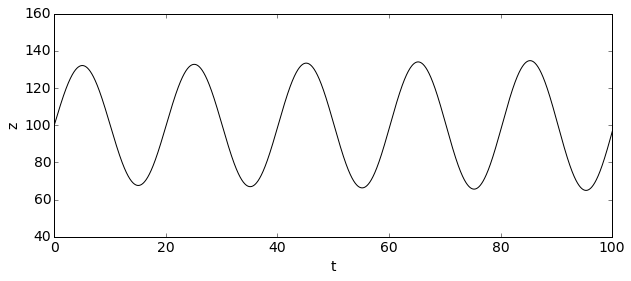

In [26]:
#plot calculated altitude over time
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z, 'k-');

# Second Challenge

In [64]:
def euler_method(T0, Tf, dt, z0, b0, zt):
    # T0 = start time; Tf= finish time; dt = time step; z0 = initial altitude; 
    # b0 = initial upwards velocity; zt = altitude at trim height
    import numpy as np
    from matplotlib import pyplot
    %matplotlib inline

    t=np.arange(0.,Tf+dt,dt)
    g=9.81
    
    u = np.array([z0, b0])
    z = np.zeros(len(t))
    z[0] = z0
    
    #time-loop for Euler's method
    for n in range(1,len(t)):
        u = u + dt*np.array([u[1], g*(1-u[0]/zt)]) #every iteration updates u=[altitude, upward velocity]
        z[n] = u[0] #record altitude at n into array z
        
    #pyplot.plot(t,z, 'k-');
    
    #return z 
    #return t

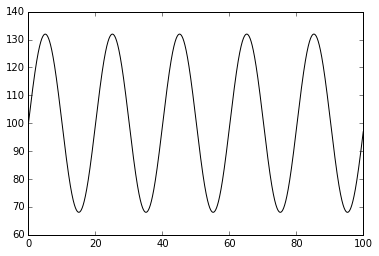

In [66]:
euler_method(0, 100, 0.01, 100, 10, 100)
pyplot.plot(t,z, 'k-');

In [67]:
# time-increment array
dt_values = np.array([0.1, 0.05])#0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = np.empty_like(dt_values, dtype=np.ndarray)

for i, dt in enumerate(dt_values):
    euler_method(0, T, dt, z0, b0, zt)
    z_values[i] = z.copy()    # store the total elevation calculation grid i

In [68]:
def get_error(z, dt):
    """Returns the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1} norm of the error with respect to the exact solution.
    """
    N = len(z)
    t = np.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*np.sin((g/zt)**.5*t)+\
                (z0-zt)*np.cos((g/zt)**.5*t)+zt
    
    return dt * np.sum(np.abs(z-z_exact))

In [69]:
error_values = np.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(z_values[i], dt)

(0.01, 0.10000000000000001, 100.0, 1000.0)

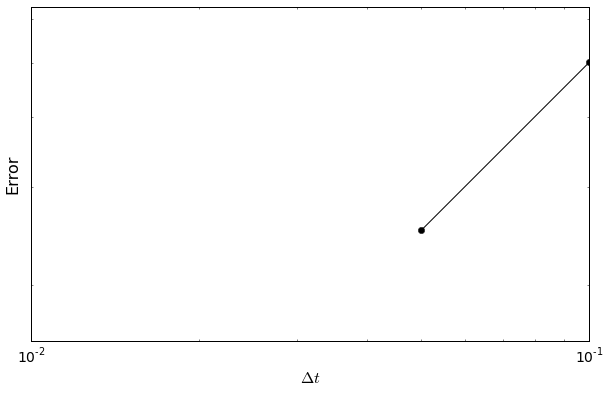

In [70]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;

In [8]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'C:\\Users\\croberts94\\Desktop\\GitHub\\MAE6286\\connor_style.css'
HTML(open(css_file, "r").read())